# Neural Network Classification with Pytorch



## 1. Make Claasification Data and get it Ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state=42)



In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First five samples of X\n: {X[:5]}')
print(f'First five samples of y\n: {y[:5]}')


First five samples of X
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y
: [1 1 1 1 0]


In [5]:
# make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


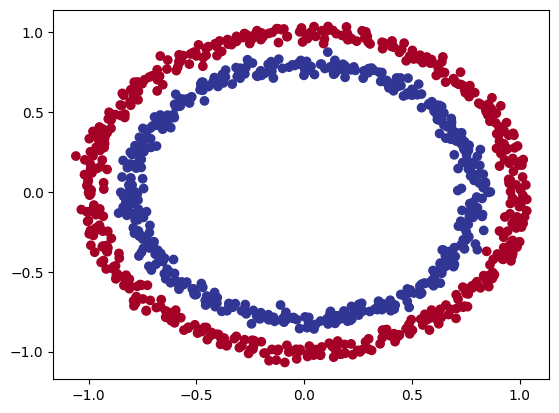

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y = X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu);

### Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# view the first sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Value for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')


Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create test train splits

In [9]:
import torch

In [10]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

Let's build a model

1. build devoce agnostic code
2. construct a model by subclassing nn.Module
3. define a loss function and optimizer
4. create a training and test loop

In [13]:
from torch import nn

In [14]:
# 1. create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Let's create a model that:

1. subclassess nn.Module
2. create 2 nn.Linear Layers that are capable of handing our data
3. define a `forward()` method
4. instantiate an instance of our model class and send it to the target device

In [15]:
# 1 make a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    # 2. create 2 nn.Linear layers that can handle our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3 define a forward() method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer 2 ->

# 4 instantiate an instance of the model class and send it to
# the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.2879, -0.4221],
        [ 0.2271,  0.0790],
        [-0.5533,  0.0834],
        [ 0.0905, -0.2664],
        [-0.6505, -0.6714]], requires_grad=True)

In [17]:
# Let's recreate the above model using nn.Sequential()
model_0= torch.nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device=device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0691,  0.1654],
                      [ 0.1209, -0.5495],
                      [ 0.6804,  0.5966],
                      [ 0.1485, -0.6031],
                      [ 0.5717,  0.1145]])),
             ('0.bias', tensor([ 0.4083,  0.0317,  0.3268,  0.1295, -0.0900])),
             ('1.weight',
              tensor([[-0.3623,  0.2905,  0.3673, -0.0670, -0.0301]])),
             ('1.bias', tensor([-0.2400]))])

In [19]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nPrint 10 predictions:\n{torch.round(untrained_preds[:10])}')
print(f'\nPrint 10 labels:\n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

Print 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.]])

Print 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup Loss function and optimizer


In [20]:
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid activation buit in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [21]:
# Calculate accuracy at the same time
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train Model

To train a model, we need to make a training loop

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs of our model are going to be raw logits

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (sigmoid for binary classification and softmax for categorical classification)

Then, we can convert our prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [22]:
# view the first 5 outputs of the forward pass
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits, y_test[:5]

(tensor([[-0.3458],
         [-0.2252],
         [-0.4749],
         [-0.3100],
         [-0.1780]]),
 tensor([1., 0., 1., 0., 1.]))

In [23]:
# use sigmoid activation on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4144],
        [0.4439],
        [0.3834],
        [0.4231],
        [0.4556]])

In [24]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test).to(device))[:5])

# check equalities
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### Building a training and test loop

In [25]:
torch.manual_seed(42)

# get the number of epochs
epochs = 100

# put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build our training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()

  # 1 forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2 calculate loos and accuracy
  loss = loss_fn(y_logits, y_train) # expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3 optimizer zero grad
  optimizer.zero_grad()

  # 4 loss backward
  loss.backward()

  # 5 optimizer step
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1 forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2 calculate test loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print what's happening
  if epoch % 10 ==0:
    print(f'Epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc:{test_acc:.2f}%')

Epoch: 0 | loss: 0.70519 | acc: 44.38% | test loss: 0.70868 | test acc:41.50%
Epoch: 10 | loss: 0.69991 | acc: 47.88% | test loss: 0.70370 | test acc:42.50%
Epoch: 20 | loss: 0.69732 | acc: 48.38% | test loss: 0.70112 | test acc:47.50%
Epoch: 30 | loss: 0.69594 | acc: 48.00% | test loss: 0.69961 | test acc:49.50%
Epoch: 40 | loss: 0.69514 | acc: 48.75% | test loss: 0.69863 | test acc:50.50%
Epoch: 50 | loss: 0.69463 | acc: 48.88% | test loss: 0.69792 | test acc:50.00%
Epoch: 60 | loss: 0.69428 | acc: 49.00% | test loss: 0.69738 | test acc:49.00%
Epoch: 70 | loss: 0.69402 | acc: 49.25% | test loss: 0.69694 | test acc:50.50%
Epoch: 80 | loss: 0.69382 | acc: 49.25% | test loss: 0.69658 | test acc:50.00%
Epoch: 90 | loss: 0.69367 | acc: 49.50% | test loss: 0.69628 | test acc:49.50%


## Make predictions and evaluate

From the metrics, it looks like our model isn't learning anything

So to inspect, let's make some predictions and visualize them

We're going to import a function called `plot_decision_boundary()`

In [26]:
from genericpath import isfile
import requests
from pathlib import Path

# download helper function from pytorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


downloading helper_functions.py


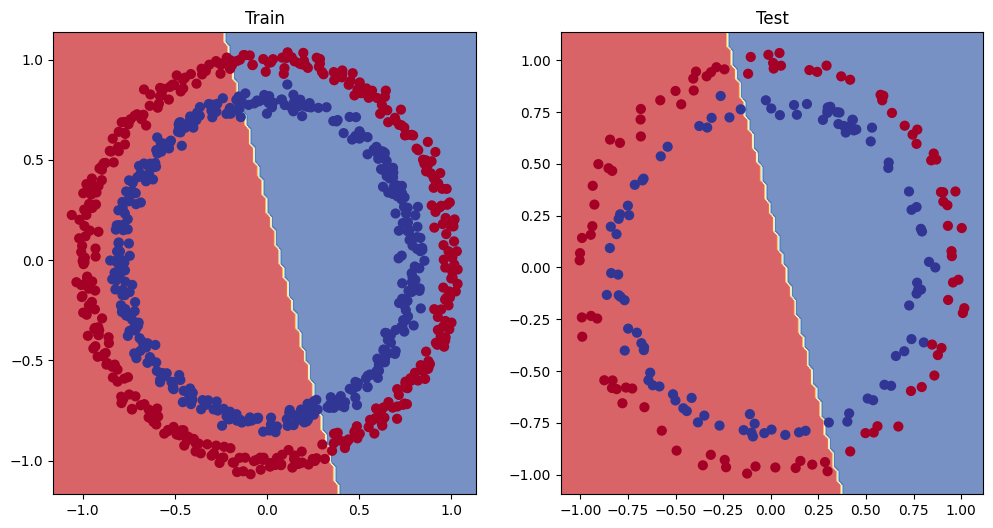

In [27]:
# plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test,y_test)



## Improving a Model (Model Perspective)

* add more layers - give the model more chances to learn patterns in the data
* Add more hidden units
* Fit for longer
* Change the activation functions
* Change the learning rate

These options are all from a model's perspective because they deal directly with the model rather than the data

Let's try to improve our model by:
* Adding more hidden units 5 -> 10
* Adding more layers 2 -> 3
* Train for longer 100 epochs -> 1000 epochs

In [28]:
class CirckeModelV1(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CirckeModelV1().to(device)
model_1

CirckeModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# create optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.1)


In [30]:
# write a training and evaluation loop for model 1
torch.manual_seed(42)

# train for longer
epochs = 1000

# put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1 forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate the loss / acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # optimize zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # calculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= test_preds)

# print out whats happening
  if epoch % 100 ==0:
      print(f'Epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc:{test_acc:.2f}%')


Epoch: 0 | loss: 0.69396 | acc: 50.88% | test loss: 0.69261 | test acc:51.00%
Epoch: 100 | loss: 0.69305 | acc: 50.38% | test loss: 0.69379 | test acc:48.00%
Epoch: 200 | loss: 0.69299 | acc: 51.12% | test loss: 0.69437 | test acc:46.00%
Epoch: 300 | loss: 0.69298 | acc: 51.62% | test loss: 0.69458 | test acc:45.00%
Epoch: 400 | loss: 0.69298 | acc: 51.12% | test loss: 0.69465 | test acc:46.00%
Epoch: 500 | loss: 0.69298 | acc: 51.00% | test loss: 0.69467 | test acc:46.00%
Epoch: 600 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test acc:46.00%
Epoch: 700 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test acc:46.00%
Epoch: 800 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test acc:46.00%
Epoch: 900 | loss: 0.69298 | acc: 51.00% | test loss: 0.69468 | test acc:46.00%


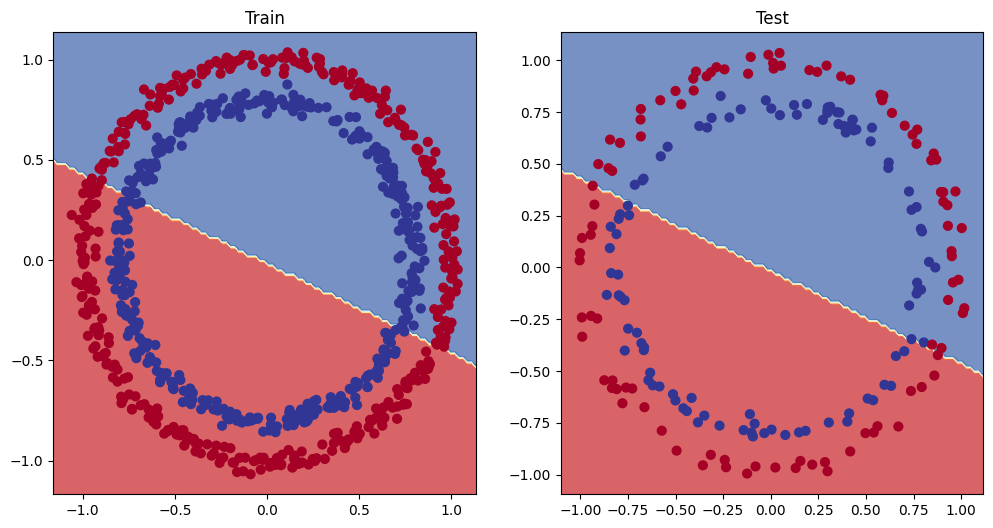

In [31]:
# plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test,y_test)

### Preparing Data to see if our model can fit a straight line

One way to troubleshoot a problem is to test out a smaller problem

In [32]:
# Create some data
weight = 0.7
bias = 0.3

start, end, step = 0, 1, 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [33]:
# create train and test split
train_split = int(0.8 * len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

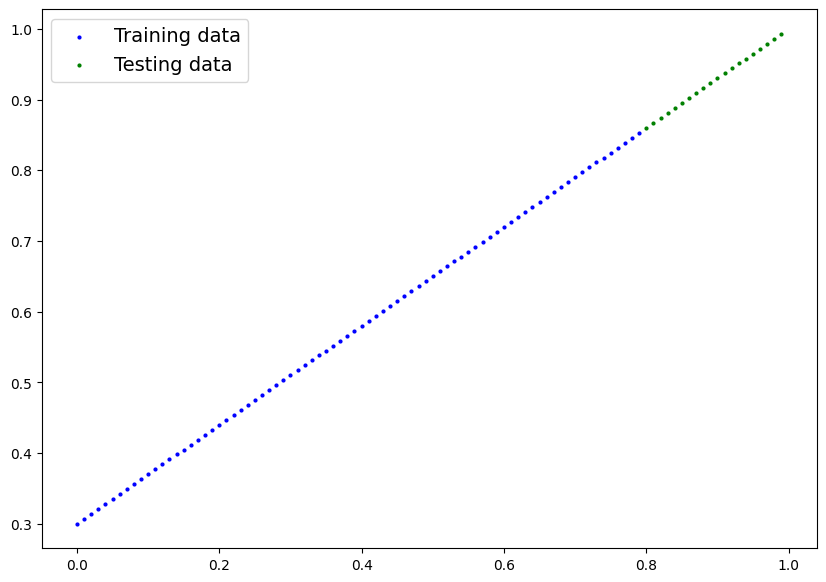

In [34]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### Adjusting model 1 to fit a straight lline

In [35]:
# Same architecture as model 1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [37]:
# train the model
torch.manual_seed(42)

# set number of epochs
epochs = 1000

# put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  # training
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #print what's happening
  if epoch % 100 ==0:
    print(f'Epoch: {epoch} | loss: {loss:.5f} | test loss: {test_loss:.5f}')








Epoch: 0 | loss: 0.75986 | test loss: 0.91103
Epoch: 100 | loss: 0.02858 | test loss: 0.00081
Epoch: 200 | loss: 0.02533 | test loss: 0.00209
Epoch: 300 | loss: 0.02137 | test loss: 0.00305
Epoch: 400 | loss: 0.01964 | test loss: 0.00341
Epoch: 500 | loss: 0.01940 | test loss: 0.00387
Epoch: 600 | loss: 0.01903 | test loss: 0.00379
Epoch: 700 | loss: 0.01878 | test loss: 0.00381
Epoch: 800 | loss: 0.01840 | test loss: 0.00329
Epoch: 900 | loss: 0.01798 | test loss: 0.00360


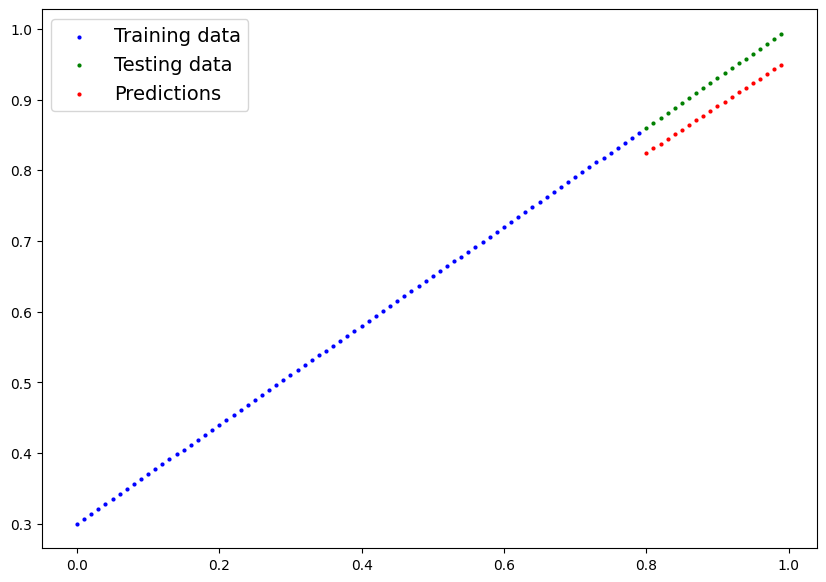

In [38]:
# make predictions
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression).numpy()

plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression,
                 predictions = y_preds)

## The missing Piece - Non Linearity

### Recreating non-linear data (red and blue circles)

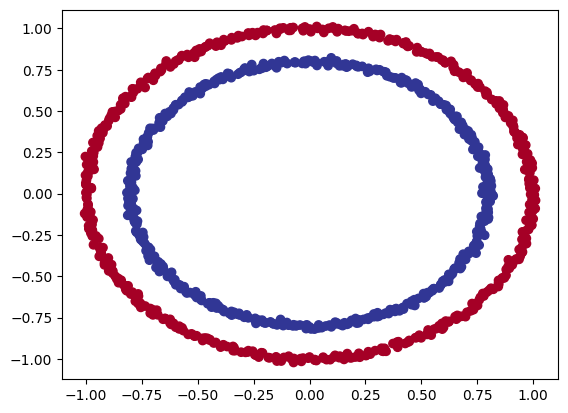

In [39]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_smaples = 1000

X, y = make_circles(n_samples,
                    noise=0.01,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c= y, cmap = plt.cm.RdYlBu);

In [40]:
# convert data to tensors and make test train spilt
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6387, -0.4846],
         [ 0.6609, -0.7366],
         [-0.9953, -0.1415],
         [-0.9719, -0.2247],
         [-0.1686,  0.7877]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non linearity

In [41]:
# build a model with non linear activation functions
class CirckeModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # where should we put out non linear activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CirckeModelV2().to(device)
model_3

CirckeModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [42]:
# make loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.1)

In [43]:
# build a training loop
torch.manual_seed(42)

epochs = 1000

# put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

### Training
for epoch in range(epochs):
  model_3.train()

  # forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train,
                    y_pred= y_preds)

  # optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= test_preds)

  # print out whats happening
  if epoch % 100 ==0:
      print(f'Epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc:{test_acc:.2f}%')



Epoch: 0 | loss: 0.69295 | acc: 50.00% | test loss: 0.69307 | test acc:50.00%
Epoch: 100 | loss: 0.69117 | acc: 53.12% | test loss: 0.69081 | test acc:53.00%
Epoch: 200 | loss: 0.68983 | acc: 52.88% | test loss: 0.68907 | test acc:55.50%
Epoch: 300 | loss: 0.68803 | acc: 53.00% | test loss: 0.68674 | test acc:56.50%
Epoch: 400 | loss: 0.68521 | acc: 53.12% | test loss: 0.68336 | test acc:56.50%
Epoch: 500 | loss: 0.68117 | acc: 53.00% | test loss: 0.67822 | test acc:56.50%
Epoch: 600 | loss: 0.67532 | acc: 53.62% | test loss: 0.67110 | test acc:57.50%
Epoch: 700 | loss: 0.66659 | acc: 57.63% | test loss: 0.66043 | test acc:61.00%
Epoch: 800 | loss: 0.65164 | acc: 63.88% | test loss: 0.64386 | test acc:69.50%
Epoch: 900 | loss: 0.62356 | acc: 74.12% | test loss: 0.61609 | test acc:78.00%


### Evaluating a Model Trained with non Linear Activations

In [44]:
# Make Predictions
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze().cpu()

y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

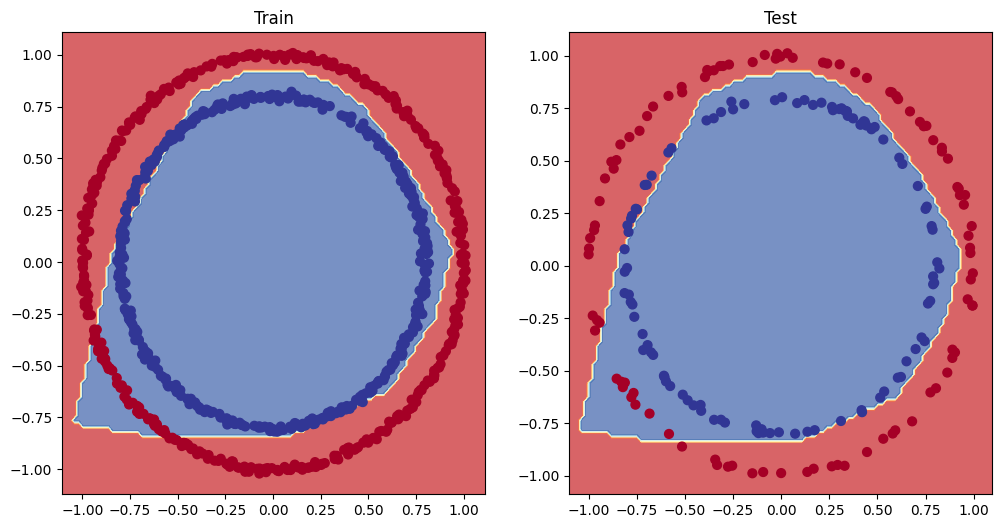

In [45]:
# plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test,y_test)

## Replicating Non-linear activation functions


In [46]:
# create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

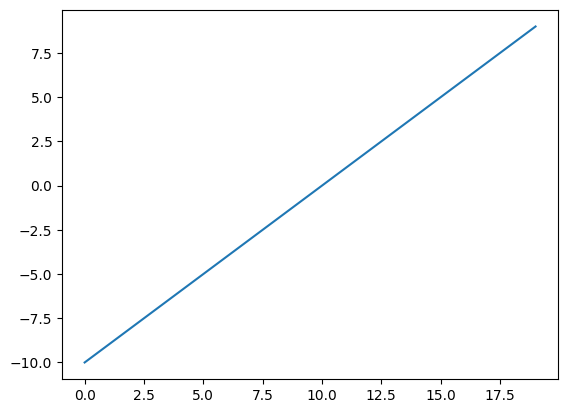

In [47]:
# visualize this data
plt.plot(A);

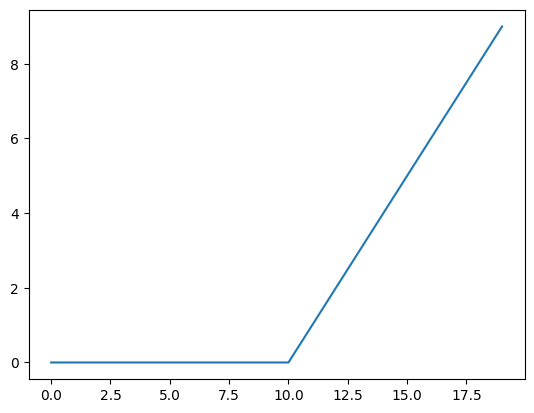

In [48]:
plt.plot(torch.relu(A));

In [49]:
def relu(x: torch.tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

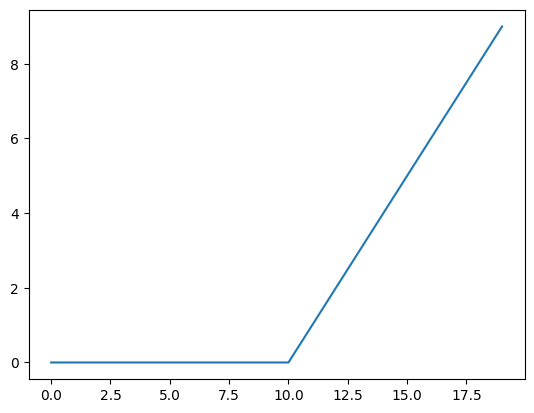

In [50]:
# plot relu()
plt.plot(relu(A));

In [51]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

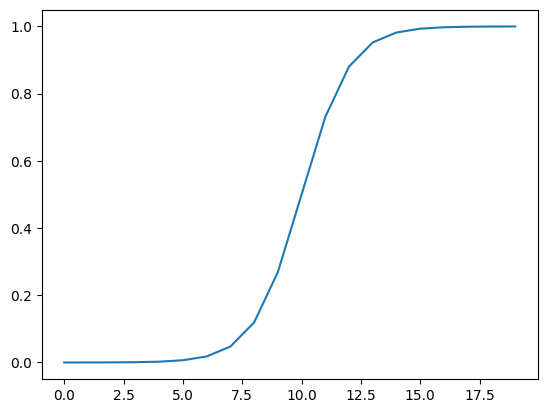

In [52]:
plt.plot(sigmoid(A));

## Putting it all Together with a multi class classification problem

### Creating our toy Dataset

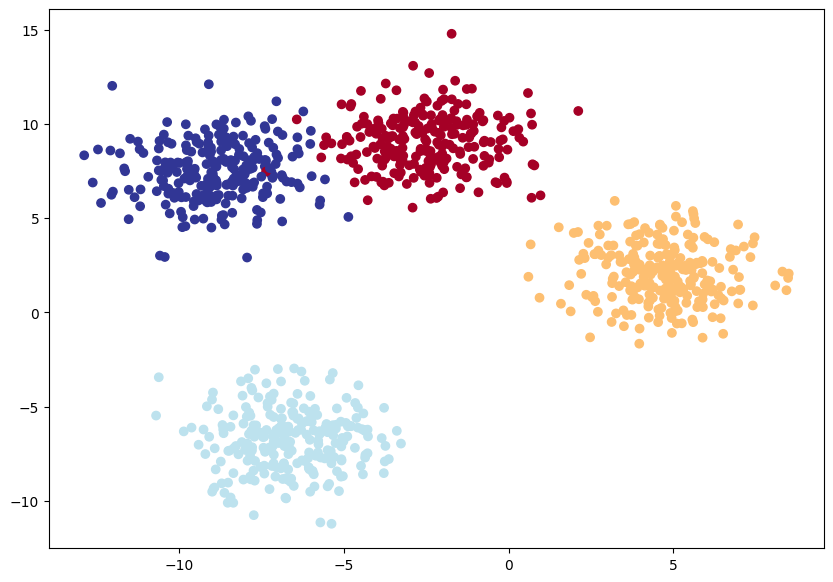

In [62]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1 Create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2 turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3 Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)


# 4 plot the data
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a multi-class classification model

In [63]:
# create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [73]:
# build the model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8) -> None:
    '''Initializes multi classification model

    Args:
      input_features (int) - number of input features to the model
      output_features (int) - number of output features (number of output classes)
      hidden units (int) - Number of hidden units between layers, defuat 8
    '''
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# instantiate class
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [74]:
# create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.1)

### Getting prediction probabilities for a mutli-class Pytorch model

In [75]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

To evaluate our model, we have tp convert the model's raw outputs (logits) to prediction probabilities to prediction labels

In [76]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_pred_probs= torch.softmax(y_logits, dim=1)
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
y_pred_labels[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3])

### Create a training and testing loop for a mutli-class classifcation model

In [77]:
# fit the model to the data
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### training
  model_4.train()

  # forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)

  # calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # print out whats happening
  if epoch % 10 ==0:
      print(f'Epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc:{test_acc:.2f}%')




Epoch: 0 | loss: 1.04324 | acc: 65.50% | test loss: 0.57861 | test acc:95.50%
Epoch: 10 | loss: 0.14398 | acc: 99.12% | test loss: 0.13037 | test acc:99.00%
Epoch: 20 | loss: 0.08062 | acc: 99.12% | test loss: 0.07216 | test acc:99.50%
Epoch: 30 | loss: 0.05924 | acc: 99.12% | test loss: 0.05133 | test acc:99.50%
Epoch: 40 | loss: 0.04892 | acc: 99.00% | test loss: 0.04098 | test acc:99.50%
Epoch: 50 | loss: 0.04295 | acc: 99.00% | test loss: 0.03486 | test acc:99.50%
Epoch: 60 | loss: 0.03910 | acc: 99.00% | test loss: 0.03083 | test acc:99.50%
Epoch: 70 | loss: 0.03643 | acc: 99.00% | test loss: 0.02799 | test acc:99.50%
Epoch: 80 | loss: 0.03448 | acc: 99.00% | test loss: 0.02587 | test acc:99.50%
Epoch: 90 | loss: 0.03300 | acc: 99.12% | test loss: 0.02423 | test acc:99.50%


In [78]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# view the first 10 preds
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [79]:
# go from logits to predictions
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [80]:
# from predictions to labels
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

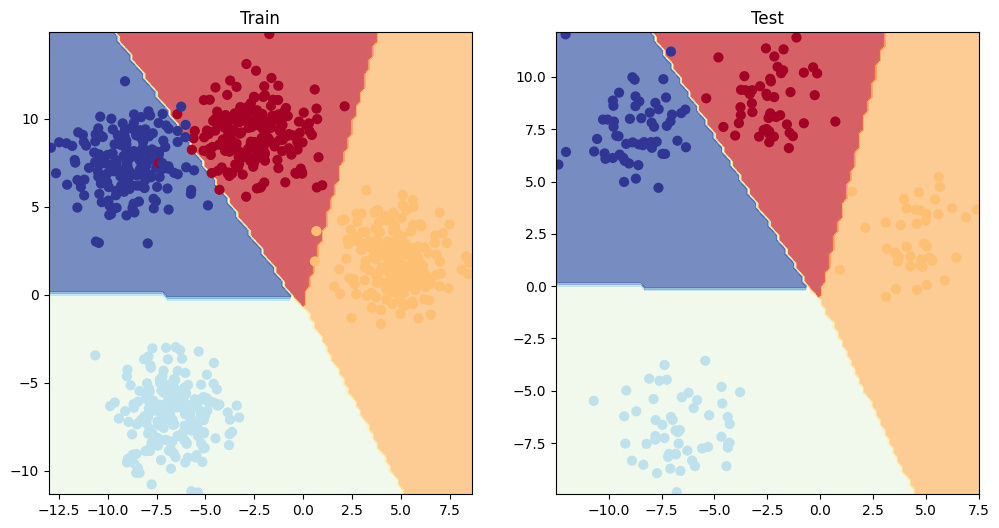

In [81]:
# plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test,y_blob_test)

In [82]:
# !pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 813.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta